In [1]:
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = 'https://cdn-assets.theforage.com/vinternship_modules/kpmg_data_analytics/KPMG_VI_New_raw_data_update_final.xlsx'
kpmg = pd.ExcelFile(url)

In [3]:
kpmg.sheet_names

['Title Sheet',
 'Transactions',
 'NewCustomerList',
 'CustomerDemographic',
 'CustomerAddress']

In [4]:
dfs = {}

In [5]:
for sheet_name in kpmg.sheet_names[1:]:
    dfs[sheet_name] = pd.read_excel(url, sheet_name = sheet_name, header = 1) 

In [6]:
transactions = dfs['Transactions'] 
newCustomerList = dfs['NewCustomerList'] 
customerDemographic = dfs['CustomerDemographic'] 
customerAddress = dfs['CustomerAddress'] 

#### Transactions 

In [7]:
transactions.sample(n=5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
19611,19612,88,908,2017-03-12,1.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,41434.0
11935,11936,85,1554,2017-08-06,0.0,Approved,WeareA2B,Standard,medium,medium,752.64,205.36,36334.0
18897,18898,21,2022,2017-10-05,1.0,Approved,Solex,Standard,medium,large,1071.23,380.74,35160.0
15854,15855,92,546,2017-02-01,1.0,Approved,WeareA2B,Standard,medium,small,1415.01,1259.36,36145.0
18807,18808,88,3166,2017-07-01,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0


In [8]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [9]:
# Split the current transactions DataFrame into two separate DataFrames: 
# 1. 'transactions', which contains transaction details such as transaction ID, customer ID, transaction date, etc.
# 2. 'products', which contains product details including product ID, brand, product line, product class, product size, 
#    list price, standard cost, and product first sold date.
# This normalization process organizes the data into two distinct entities, enhancing data integrity and 
# facilitating efficient querying and lower memory storage.

products = transactions[['product_id', 'brand', 'product_line', 'product_class', 'product_size', 'list_price', 'standard_cost', 'product_first_sold_date']].drop_duplicates(subset=['product_id'])
transactions = transactions[['transaction_id', 'product_id', 'customer_id', 'transaction_date', 'online_order', 'order_status', 'list_price']]

##### Transactions - transactions

In [10]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    20000 non-null  int64         
 1   product_id        20000 non-null  int64         
 2   customer_id       20000 non-null  int64         
 3   transaction_date  20000 non-null  datetime64[ns]
 4   online_order      19640 non-null  float64       
 5   order_status      20000 non-null  object        
 6   list_price        20000 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 1.1+ MB


In [11]:
products.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101 entries, 0 to 509
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   product_id               101 non-null    int64  
 1   brand                    101 non-null    object 
 2   product_line             101 non-null    object 
 3   product_class            101 non-null    object 
 4   product_size             101 non-null    object 
 5   list_price               101 non-null    float64
 6   standard_cost            101 non-null    float64
 7   product_first_sold_date  101 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 7.1+ KB


In [12]:
transactions['online_order'].value_counts()

online_order
1.0    9829
0.0    9811
Name: count, dtype: int64

In [13]:
# 1.0 and 0.0, with similar counts.
# Filling missing values in the 'online_order' column with 2 to represent unknown status,
# then converting it to a categorical datatype for better representation and analysis.
transactions['online_order'] = transactions['online_order'].fillna(2).astype('int').astype('category')

C:\Users\Chieng Bao Qing\AppData\Local\Temp\ipykernel_10368\997585644.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions['online_order'] = transactions['online_order'].fillna(2).astype('int').astype('category')


In [14]:
before_memory = transactions['order_status'].memory_usage(deep=True)
print("Memory usage before conversion:", before_memory)

# Convert to category
transactions['order_status'] = transactions['order_status'].astype('category')

after_memory = transactions['order_status'].memory_usage(deep=True)
print("Memory usage after conversion:", after_memory)

Memory usage before conversion: 1300311
Memory usage after conversion: 20371


C:\Users\Chieng Bao Qing\AppData\Local\Temp\ipykernel_10368\1832675729.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions['order_status'] = transactions['order_status'].astype('category')


In [15]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    20000 non-null  int64         
 1   product_id        20000 non-null  int64         
 2   customer_id       20000 non-null  int64         
 3   transaction_date  20000 non-null  datetime64[ns]
 4   online_order      20000 non-null  category      
 5   order_status      20000 non-null  category      
 6   list_price        20000 non-null  float64       
dtypes: category(2), datetime64[ns](1), float64(1), int64(3)
memory usage: 820.7 KB


In [16]:
transactions.describe(include='all')

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,list_price
count,20000.000000,20000.00000,20000.000000,20000,20000.0,20000,20000.000000
unique,NaN,NaN,NaN,NaN,3.0,2,NaN
top,NaN,NaN,NaN,NaN,1.0,Approved,NaN
freq,NaN,NaN,NaN,NaN,9829.0,19821,NaN
mean,10000.500000,45.36465,1738.246050,2017-07-01 14:08:05.280000,NaN,NaN,1107.829449
min,1.000000,0.00000,1.000000,2017-01-01 00:00:00,NaN,NaN,12.010000
25%,5000.750000,18.00000,857.750000,2017-04-01 00:00:00,NaN,NaN,575.270000
50%,10000.500000,44.00000,1736.000000,2017-07-03 00:00:00,NaN,NaN,1163.890000
75%,15000.250000,72.00000,2613.000000,2017-10-02 00:00:00,NaN,NaN,1635.300000
max,20000.000000,100.00000,5034.000000,2017-12-30 00:00:00,NaN,NaN,2091.470000


In [17]:
transactions['order_status'].value_counts()

order_status
Approved     19821
Cancelled      179
Name: count, dtype: int64

In [18]:
transactions.sample(n=5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,list_price
13162,13163,57,2321,2017-06-04,0,Approved,1890.39
78,79,87,102,2017-09-12,1,Approved,1179.00
15138,15139,96,315,2017-03-16,0,Approved,1172.78
10130,10131,9,1181,2017-04-28,0,Approved,742.54
3572,3573,93,1115,2017-06-03,0,Approved,1458.17


##### Transactions - products

In [19]:
products.describe(include='all')

,product_id,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
count,101.000000,101,101,101,101,101.000000,101.000000,101.000000
unique,NaN,6,4,3,3,NaN,NaN,NaN
top,NaN,Solex,Standard,medium,medium,NaN,NaN,NaN
freq,NaN,23,74,69,67,NaN,NaN,NaN
mean,50.000000,NaN,NaN,NaN,NaN,1165.893069,575.170693,38305.643564
std,29.300171,NaN,NaN,NaN,NaN,563.195204,421.738591,3024.258076
min,0.000000,NaN,NaN,NaN,NaN,60.340000,13.440000,33364.000000
25%,25.000000,NaN,NaN,NaN,NaN,742.540000,230.090000,35560.000000
50%,50.000000,NaN,NaN,NaN,NaN,1198.460000,513.850000,38206.000000
75%,75.000000,NaN,NaN,NaN,NaN,1661.920000,820.780000,41245.000000


In [20]:
products['brand'].value_counts()

brand
Solex             23
WeareA2B          19
Giant Bicycles    17
Trek Bicycles     15
OHM Cycles        15
Norco Bicycles    12
Name: count, dtype: int64

In [21]:
products['product_line'].value_counts()

product_line
Standard    74
Road        19
Touring      5
Mountain     3
Name: count, dtype: int64

In [22]:
products['product_class'].value_counts()

product_class
medium    69
high      17
low       15
Name: count, dtype: int64

In [23]:
products['product_size'].value_counts()

product_size
medium    67
large     21
small     13
Name: count, dtype: int64

In [24]:
from datetime import datetime, timedelta
#convert product_first_sold_date from Excel serial numbers to datetime

# Base date for Excel serial numbers (December 30, 1899)
base_date = datetime(1899, 12, 30)

# Define a function to convert Excel serial number to datetime
def excel_to_datetime(excel_serial_number):
    return base_date + timedelta(days=excel_serial_number)

# Convert Excel serial numbers to datetime in the DataFrame column
products['product_first_sold_date'] = products['product_first_sold_date'].apply(excel_to_datetime)

In [25]:
products.sample(n=5)

,product_id,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
48,86,OHM Cycles,Standard,medium,medium,235.63,125.07,2004-08-07
108,39,Giant Bicycles,Standard,medium,large,1812.75,582.48,2006-10-01
168,97,Solex,Standard,medium,large,202.62,151.96,2004-01-16
135,65,WeareA2B,Standard,medium,medium,1807.45,778.69,2015-04-11
42,76,WeareA2B,Standard,low,medium,642.31,513.85,2014-10-10


In [26]:
products.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101 entries, 0 to 509
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   product_id               101 non-null    int64         
 1   brand                    101 non-null    object        
 2   product_line             101 non-null    object        
 3   product_class            101 non-null    object        
 4   product_size             101 non-null    object        
 5   list_price               101 non-null    float64       
 6   standard_cost            101 non-null    float64       
 7   product_first_sold_date  101 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 7.1+ KB


**Transactions**

##### Overview
The dataset initially contains 20,000 rows and 13 columns, covering transactions dated between January 1st, 2017, and December 31st, 2017. The primary aim was to preprocess and normalize the dataset for efficient analysis and storage.

##### Data Normalization
The initial step involved splitting the dataset into two separate DataFrames:

- Transactions: Contains transaction-specific details such as transaction ID, customer ID, transaction date, etc. Contains 20,000 rows and 7 columns.
- Products: Contains product-specific details including product ID, brand, product line, product class, product size, list price, standard cost, and product first sold date. Contains 101 rows and 8 columns. 

This normalization process enhances data integrity and facilitates efficient querying while optimizing memory storage.

##### Preprocessing Steps
1. Filled missing values in the 'online_order' column with 2 to represent an unknown status, converted it to an integer datatype, and then to a categorical datatype.
2. Converted the 'order_status' column to categorical datatype.
3. Converted the 'product_first_sold_date' column from Excel serial numbers to datetime format


##### Quality Assurance
1. Checked for typographical errors and ensured data accuracy and consistency.
2. Performed duplicate check and confirmed that no duplicates were found in the dataset.3. Ensure appropriate data types for each column to enhance data accuracy and analysis efficiency.



#### NewCustomerList

In [27]:
newCustomerList.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.8750,0.743750,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.8900,1.1125,0.945625,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.0100,1.0100,1.010000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.0875,1.087500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.52,0.5200,0.6500,0.650000,4,4,1.703125


In [28]:
newCustomerList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           1000 non-null   object 
 1   last_name                            971 non-null    object 
 2   gender                               1000 non-null   object 
 3   past_3_years_bike_related_purchases  1000 non-null   int64  
 4   DOB                                  983 non-null    object 
 5   job_title                            894 non-null    object 
 6   job_industry_category                835 non-null    object 
 7   wealth_segment                       1000 non-null   object 
 8   deceased_indicator                   1000 non-null   object 
 9   owns_car                             1000 non-null   object 
 10  tenure                               1000 non-null   int64  
 11  address                        

In [29]:
newCustomerList = newCustomerList.iloc[:, :16]

In [30]:
newCustomerList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   first_name                           1000 non-null   object
 1   last_name                            971 non-null    object
 2   gender                               1000 non-null   object
 3   past_3_years_bike_related_purchases  1000 non-null   int64 
 4   DOB                                  983 non-null    object
 5   job_title                            894 non-null    object
 6   job_industry_category                835 non-null    object
 7   wealth_segment                       1000 non-null   object
 8   deceased_indicator                   1000 non-null   object
 9   owns_car                             1000 non-null   object
 10  tenure                               1000 non-null   int64 
 11  address                              1000 no

In [31]:
newCustomerList.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11
2,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9


In [32]:
newCustomerList['job_industry_category'].value_counts()

job_industry_category
Financial Services    203
Manufacturing         199
Health                152
Retail                 78
Property               64
IT                     51
Entertainment          37
Argiculture            26
Telecommunications     25
Name: count, dtype: int64

In [33]:
newCustomerList['wealth_segment'].value_counts()

wealth_segment
Mass Customer        508
High Net Worth       251
Affluent Customer    241
Name: count, dtype: int64

In [34]:
newCustomerList['deceased_indicator'].value_counts()

deceased_indicator
N    1000
Name: count, dtype: int64

In [35]:
newCustomerList['owns_car'].value_counts()

owns_car
No     507
Yes    493
Name: count, dtype: int64

In [36]:
newCustomerList['state'].value_counts()

state
NSW    506
VIC    266
QLD    228
Name: count, dtype: int64

In [37]:
newCustomerList['country'].value_counts()

country
Australia    1000
Name: count, dtype: int64

In [38]:
newCustomerList[newCustomerList.duplicated()]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation


#### NewCustomerList

##### Overview
The dataset initially contains 1,000 rows and 16 columns. 

**Data Cleaning**
- Irrelevant columns were dropped.

**Quality Assurance**
- Checked for typographical errors and ensured data accuracy and consistency.
- Performed duplicate check and confirmed that no duplicates were found in the dataset.
- Ensure appropriate data types for each column to enhance data accuracy and analysis efficiency.

**NewCustomerList**

##### Overview
The dataset initially contains 1,000 rows a23 16 columns.**Preprocessing Steps**
ng**
- Irrelevant(7) columns were dropped.

**Quality Assurance**
- Checked for typographical errors and ensured data accuracy and consistency.
- Performed duplicate check and confirmed that no duplicates were found in the dataset.
- Ensure appropriate data types for each column to enhance data accuracy and analysis. 

The final dataset now contains 1,000 rows and 16 columns. 6 columns. ficiency.



#### CustomerDemographic

In [39]:
customerDemographic.sample(n=5)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
2576,2577,Thor,Rickardsson,Male,78,1976-03-19 00:00:00,Operator,NaN,Mass Customer,N,â°â´âµ,Yes,10.0
664,665,Chan,Kirckman,Male,82,1997-04-19 00:00:00,Human Resources Assistant I,NaN,Mass Customer,N,1000000000000000049861653971908893017010268485...,No,5.0
39,40,Tomasine,Jerche,Female,91,1981-10-27 00:00:00,Payment Adjustment Coordinator,Manufacturing,Affluent Customer,N,Ì¦HÍÌ¬Ì¤ÌÌ¤eÍ ÍÌÌ¥ÌÌ»ÍÌwÌhÌÌ¯ÍoÌÍÌÍÌ±Ì® ÒÌºÌÌÌ...,No,14.0
2452,2453,Ruthe,Campe,Female,22,1992-08-05 00:00:00,Safety Technician II,Telecommunications,High Net Worth,N,1,No,9.0
2983,2984,Frances,Mishaw,Female,48,1959-05-23 00:00:00,Payment Adjustment Coordinator,Manufacturing,Mass Customer,N,Ù¡Ù¢Ù£,Yes,13.0


In [40]:
customerDemographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   last_name                            3875 non-null   object 
 3   gender                               4000 non-null   object 
 4   past_3_years_bike_related_purchases  4000 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  default                              3698 non-null   object 
 11  owns_car                      

In [41]:
customerDemographic['gender'].value_counts()

gender
Female    2037
Male      1872
U           88
F            1
Femal        1
M            1
Name: count, dtype: int64

In [42]:
customerDemographic['gender'].replace({'Femal': 'Female', 'F': 'Female', 'M': 'Male'}, inplace=True)

In [43]:
customerDemographic['gender'].value_counts()

gender
Female    2039
Male      1873
U           88
Name: count, dtype: int64

In [44]:
customerDemographic['DOB'] = pd.to_datetime(customerDemographic['DOB'])

In [45]:
customerDemographic['DOB'].min()

Timestamp('1843-12-21 00:00:00')

In [46]:
customerDemographic['age'] = 2017 - customerDemographic['DOB'].dt.year

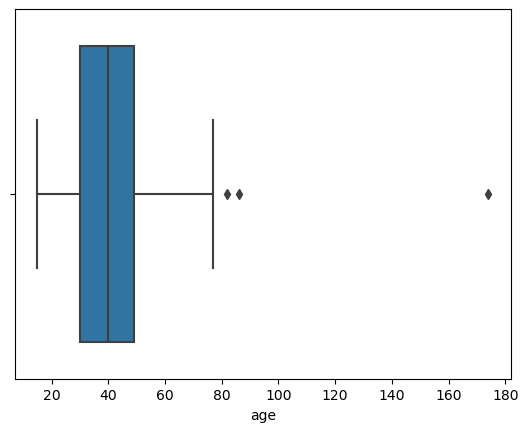

In [47]:
sns.boxplot(data = customerDemographic, x ='age')
plt.show()

In [48]:
#considering it might be typo for the DOB of 1843, I'd replace it with 1943

customerDemographic.loc[customerDemographic['DOB'].dt.year == 1843, 'DOB'] += pd.DateOffset(years=100)

In [49]:
customerDemographic['age'] = 2017 - customerDemographic['DOB'].dt.year

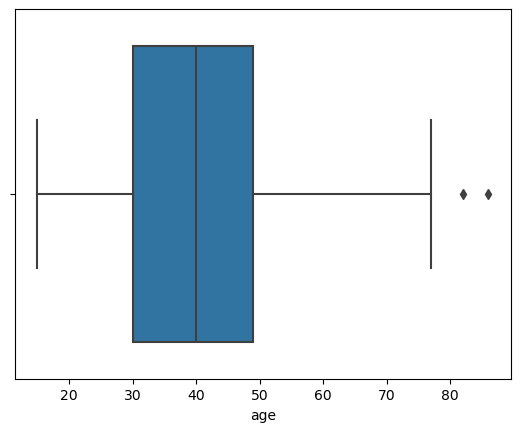

In [50]:
sns.boxplot(data = customerDemographic, x ='age')
plt.show()

In [51]:
customerDemographic['job_title'].value_counts()

job_title
Business Systems Development Analyst    45
Tax Accountant                          44
Social Worker                           44
Internal Auditor                        42
Recruiting Manager                      41
                                        ..
Database Administrator I                 4
Health Coach I                           3
Health Coach III                         3
Research Assistant III                   3
Developer I                              1
Name: count, Length: 195, dtype: int64

In [52]:
customerDemographic['job_industry_category'].value_counts()

job_industry_category
Manufacturing         799
Financial Services    774
Health                602
Retail                358
Property              267
IT                    223
Entertainment         136
Argiculture           113
Telecommunications     72
Name: count, dtype: int64

In [53]:
customerDemographic['wealth_segment'].value_counts()

wealth_segment
Mass Customer        2000
High Net Worth       1021
Affluent Customer     979
Name: count, dtype: int64

In [54]:
customerDemographic['owns_car'].value_counts()

owns_car
Yes    2024
No     1976
Name: count, dtype: int64

In [55]:
customerDemographic.drop(columns=['default'],inplace=True)

In [56]:
customerDemographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,64.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,37.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,63.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,56.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,40.0


In [57]:
customerDemographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  owns_car    

#### customerDemographic

##### Overview
The dataset initially contains 4,000 rows and 14 columns. 

**Preprocessing Steps**
1. Corrected typos in the 'gender' column by replacing 'Femal' with 'Female', 'F' with 'Female', and 'M' with 'Male'.
2. Adjusted the birth dates in the 'DOB' column by adding 100 years to dates that were recorded as 1843, assuming they were input errors.
3. Dropped the 'default' column as it was deemed irrelevant for analysis.

**Quality Assurance**
- Checked for typographical errors and ensured data accuracy and consistency.
- Performed duplicate check and confirmed that no duplicates were found in the dataset.
- Ensured appropriate data types for each column to enhance data accuracy and analysis efficiency.

The dataset initially contains 4,000 rows and 13 columns. 

#### CustomerAddress

In [58]:
customerAddress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [59]:
customerAddress['state'].value_counts()

state
NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: count, dtype: int64

In [60]:
customerAddress['state'].replace({'New South Wales':'NSW', 'Victoria':'VIC'}, inplace=True)

In [61]:
customerAddress['state'].value_counts()

state
NSW    2140
VIC    1021
QLD     838
Name: count, dtype: int64

In [62]:
customerAddress['country'].value_counts()

country
Australia    3999
Name: count, dtype: int64

#### customerDemographic

##### Overview
The dataset initially contains 4,000 rows and 6 columns. 

**Preprocessing Steps**
1. Corrected state abbreviations in the 'state' column by replacing 'New South Wales' with 'NSW' and 'Victoria' with 'VIC'.

**Quality Assurance**
- Checked for typographical errors and ensured data accuracy and consistency.
- Performed duplicate check and confirmed that no duplicates were found in the dataset.
- Ensured appropriate data types for each column to enhance data accuracy and analysis efficiency.

The dataset initially contains 4,000 rows and 6 columns. 